In [4]:
import pandas as pd

# Load the Excel file
file_path = "./data/raw/1.2_Prevalence_of_drug_use_in_the_general_population_national_data.xlsx"
xls = pd.ExcelFile(file_path)

# Check what sheets exist
xls.sheet_names


['Cannabis',
 'Cocaine',
 'Amphetamines',
 'Ecstasy',
 'Prescription Stimulants',
 'Opioids',
 'Opiates',
 'Prescription opioids',
 'Tranquillizers and sedatives',
 'NPS']

In [5]:
df = pd.read_excel(xls, sheet_name="Cocaine")  
df.head()

,Unnamed: 0,"COCAINE\n(includes cocaine salt, ""crack"" cocaine and other types such as coca paste, cocaine base, basuco, paco and merla)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Annual Prevalence of Use as a percentage of th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Region,Sub-region,Country/Territory,Best,Low,High,Male,Female,Year,Age,Source,Method,Adjustment/\n notes,Specific notes
2,NaN,Africa,East Africa,Kenya,0.1,NaN,NaN,0.2,0,2016,15-64,ARQ,HHS,NaN,Crack
3,NaN,NaN,NaN,Kenya,0.3,0.2,0.4,NaN,NaN,2007,15-65,Government source,HHS,"b, e",NaN
4,NaN,NaN,North Africa,Algeria,0.01,NaN,NaN,0.02,NaN,2010,12+,ARQ,HHS,NaN,NaN


In [6]:
import pandas as pd

# Load Excel file, skipping the first row
file_path = "./data/raw/1.2_Prevalence_of_drug_use_in_the_general_population_national_data.xlsx"
df = pd.read_excel(file_path, skiprows=2)

# Preview first few rows
df.head()


,Unnamed: 0,Region,Sub-region,Country/Territory,Best,Low,High,Male,Female,Year,Age,Source,Method,Adjustment/\n notes,Specific notes
0,NaN,Africa,East Africa,Kenya,2.1,1.9,2.28,NaN,NaN,2022,15-65,Government/UNODC Estimate,HHS,e,"""Low"" and ""High"" figures are results of a sens..."
1,NaN,NaN,NaN,Kenya,1.2,NaN,NaN,2.1,0.3,2017,15-65,ARQ,HHS,NaN,NaN
2,NaN,NaN,NaN,Kenya,2.1,0.3,4.00,NaN,NaN,2007,15-65,Govt,HHS,"b, e",NaN
3,NaN,NaN,NaN,Kenya,7.1,NaN,NaN,NaN,NaN,2004,15-64,"ARQ, NGO, Council of Europe","SS, A","c, d, e, f",NaN
4,NaN,NaN,NaN,Madagascar,9.1,NaN,NaN,NaN,NaN,2004,15-64,ARQ,"SS, A","d, e",NaN


In [7]:
df = df.dropna(axis=1, how="all")

In [8]:
columns_to_keep = ["Region", "Sub-region", "Country/Territory", "Best", "Year", "Age"]
df = df[columns_to_keep]

In [9]:
df["Best"] = pd.to_numeric(df["Best"], errors="coerce")

In [10]:
df.head()


,Region,Sub-region,Country/Territory,Best,Year,Age
0,Africa,East Africa,Kenya,2.1,2022,15-65
1,NaN,NaN,Kenya,1.2,2017,15-65
2,NaN,NaN,Kenya,2.1,2007,15-65
3,NaN,NaN,Kenya,7.1,2004,15-64
4,NaN,NaN,Madagascar,9.1,2004,15-64


In [11]:
# Forward-fill missing values for 'Region' and 'Sub-region'
df["Region"] = df["Region"].ffill()
df["Sub-region"] = df["Sub-region"].ffill()


In [12]:
df.head()

,Region,Sub-region,Country/Territory,Best,Year,Age
0,Africa,East Africa,Kenya,2.1,2022,15-65
1,Africa,East Africa,Kenya,1.2,2017,15-65
2,Africa,East Africa,Kenya,2.1,2007,15-65
3,Africa,East Africa,Kenya,7.1,2004,15-64
4,Africa,East Africa,Madagascar,9.1,2004,15-64


In [13]:
df[["Region", "Sub-region"]].isna().sum()


Region        0
Sub-region    0
dtype: int64

In [14]:
df.to_csv("cocaine_prevalence.csv", index=False)


In [15]:
countries_to_keep = ["France", "Greece", "Netherlands (Kingdom of the)", "Spain", "United States of America", "Portugal", "Sweden", "Peru", "Colombia", "Brazil", "Bolivia (Plurinational State of)", "Belgium"]

In [16]:
df_filtered = df[df["Country/Territory"].isin(countries_to_keep)]


In [17]:
df_filtered = df_filtered.reset_index(drop=True)


In [18]:
df_filtered.head()


,Region,Sub-region,Country/Territory,Best,Year,Age
0,Americas,North America,United States of America,26.379918,2023,15-64
1,Americas,North America,United States of America,26.621936,2022,15-64
2,Americas,North America,United States of America,22.880000,2021,15-64
3,Americas,North America,United States of America,21.900000,2020,15-64
4,Americas,North America,United States of America,19.400000,2018,15-64


In [19]:
df_filtered.to_csv("cocaine_prevalence_12_countries.csv", index=False)


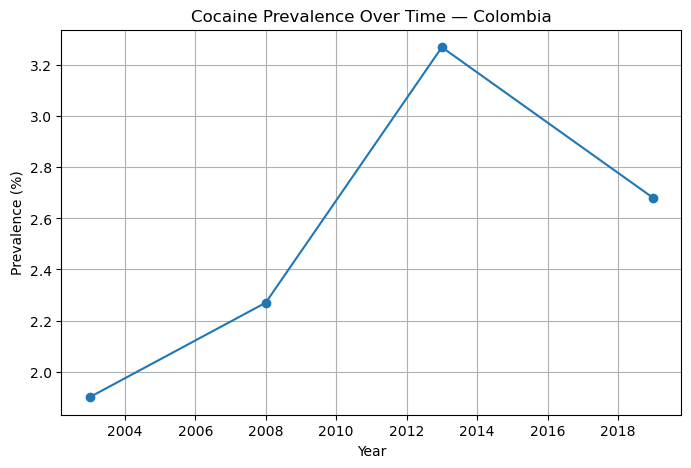

In [20]:
import matplotlib.pyplot as plt

country = "Colombia"
df_country = df_filtered[df_filtered["Country/Territory"] == country]

plt.figure(figsize=(8, 5))
plt.plot(df_country["Year"], df_country["Best"], marker="o", linestyle="-")
plt.title(f"Cocaine Prevalence Over Time — {country}")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.grid(True)
plt.show()


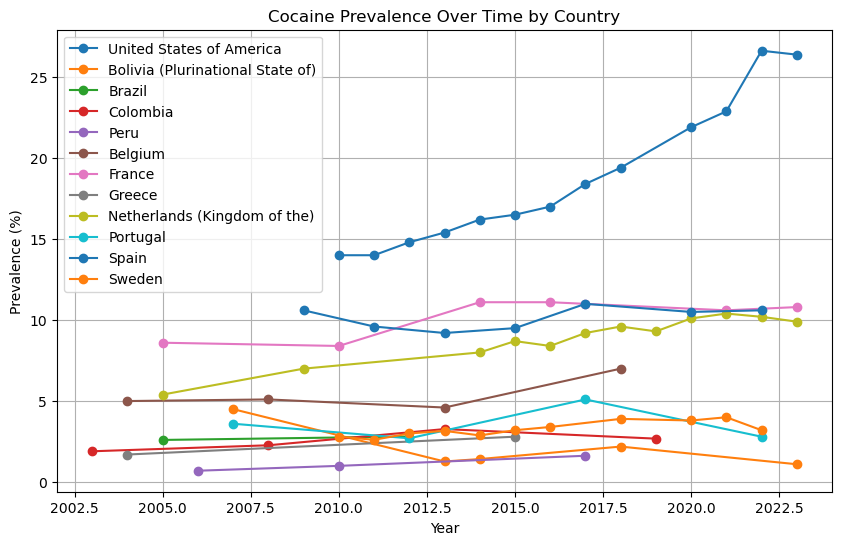

In [21]:
plt.figure(figsize=(10, 6))
countries = df_filtered["Country/Territory"].unique()
for country in countries:
    df_country = df_filtered[df_filtered["Country/Territory"] == country]
    plt.plot(df_country["Year"], df_country["Best"], marker="o", label=country)

plt.title("Cocaine Prevalence Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
df["Country/Territory"].unique()

array(['Kenya', 'Madagascar', 'Mauritius', 'Algeria', 'Egypt', 'Morocco',
       'Tunisia', 'South Africa', 'Zambia', 'Burkina Faso', 'Cabo Verde',
       "Côte d'Ivoire", 'Liberia', 'Nigeria ', 'Nigeria', 'Sierra Leone',
       'Togo', 'Bahamas', 'Barbados', 'Dominican Republic', 'Haiti',
       'Jamaica', 'Puerto Rico', 'Saint Lucia', 'Trinidad and Tobago',
       'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras',
       'Nicaragua', 'Panama', 'Bermuda', 'Canada', 'Mexico',
       'United States of America', 'Argentina',
       'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia',
       'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay',
       'Venezuela (Bolivarian Republic of)', 'Armenia', 'Azerbaijan',
       'Georgia', 'Kazakhstan', 'Uzbekistan', 'Cambodia',
       'China, Macao SAR', 'China, Taiwan Province of China', 'Indonesia',
       'Japan', "Lao People's Democratic Republic", 'Malaysia', 'Myanmar',
       'Philippines', 'Republic of 

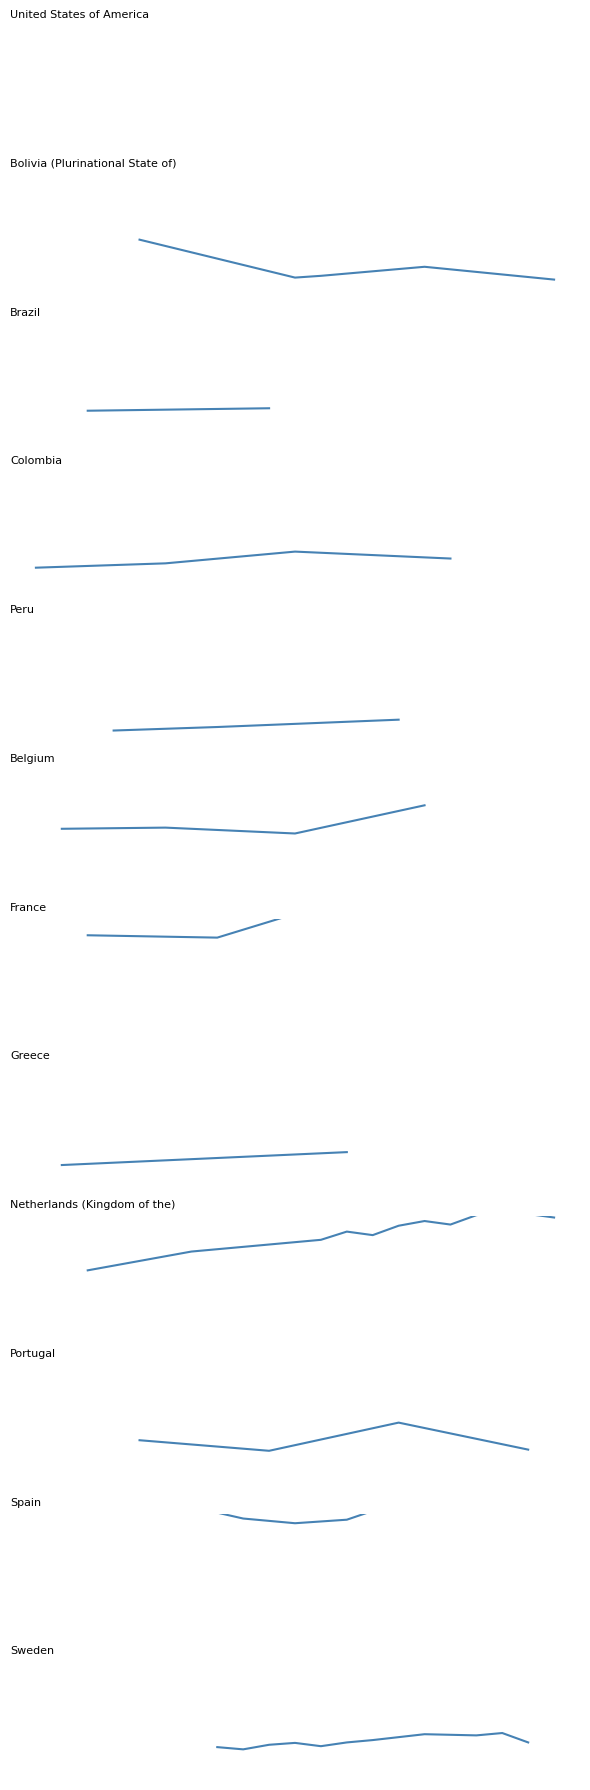

In [23]:
import matplotlib.pyplot as plt

countries = df_filtered["Country/Territory"].unique()
num_countries = len(countries)

fig, axes = plt.subplots(nrows=num_countries, ncols=1, figsize=(6, num_countries*1.5), sharex=True)

for ax, country in zip(axes, countries):
    df_country = df_filtered[df_filtered["Country/Territory"] == country]
    ax.plot(df_country["Year"], df_country["Best"], color="steelblue", linewidth=1.5)
    ax.set_title(country, fontsize=8, loc='left')
    ax.set_ylim(0, 10)  # set manually or to percentile range
    ax.axis("off")  # sparkline aesthetic: remove axes lines and labels

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

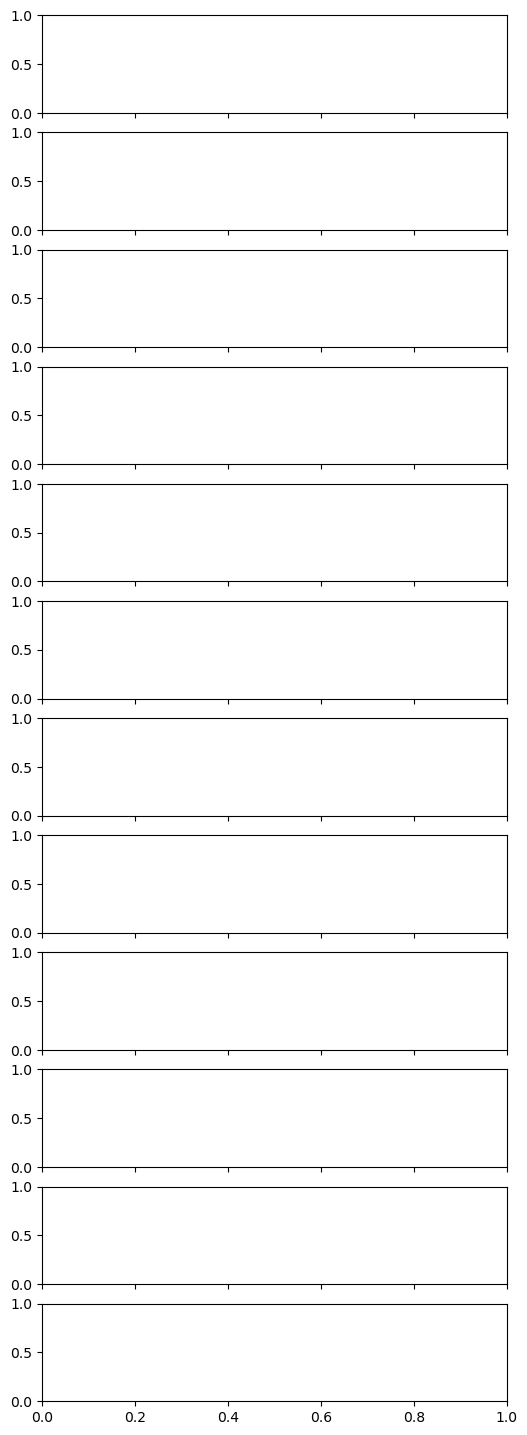

In [25]:
# Clip prevalence values to the 1st–99th percentile range before plotting
low, high = df_filtered["Best"].quantile([0.01, 0.99])

fig, axes = plt.subplots(nrows=num_countries, ncols=1, figsize=(6, num_countries*1.5), sharex=True)

for ax, country in zip(axes, countries):
    df_country = df_filtered[df_filtered["Country/Territory"] == country].sort_values("Year")
    y = np.clip(df_country["Best"], low, high)
    ax.plot(df_country["Year"], y, color="steelblue", linewidth=1.5)
    ax.set_title(country, fontsize=8, loc='left')
    ax.axis("off")

plt.tight_layout()
plt.show()


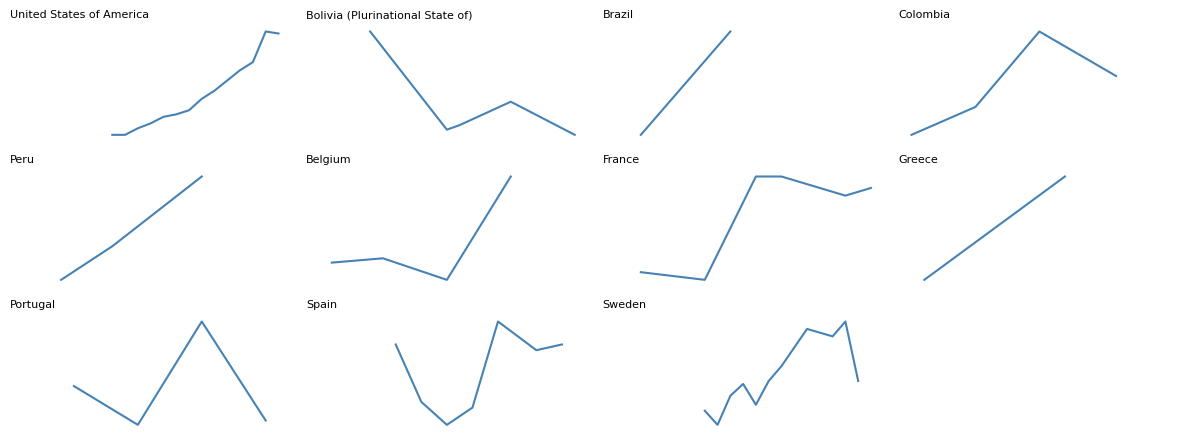

In [ ]:
ncols = 4
nrows = int(np.ceil(len(countries) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows*1.5), sharex=True, sharey=False)
axes = axes.flatten()

for i, country in enumerate(countries):
    df_country = df_filtered[df_filtered["Country/Territory"] == country].sort_values("Year")
    axes[i].plot(df_country["Year"], df_country["Best"], color="steelblue", linewidth=1.5)
    axes[i].set_title(country, fontsize=8, loc='left')
    axes[i].axis("off")

# remove unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
